<div align="center"><h1>Control Engineering Basics</h1>
<br><b>Dr.Varodom Toochinda</b>
<br>Dept. of Mechanical Engineering, Kasetsart University</div>

<a href="https://colab.research.google.com/github/dewdotninja/control_python/blob/master/ceb_m2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 2: Feedback Properties

<b>Requirement : </b> Python 3 with Python control systems library
<p />Execute the commands below to install Python control systems library in Colab    


In [ ]:
!pip install control

This article is contained in Control Engineering Basics study module, which is used as course material for Electrical-Mechanical Manufacturing Engineering (EMME), Department of Mechanical Engineering, Kasetsart University.

### Module Key Study Points
* The benefiets of feedback
* Step response and tracking performance
* Stability judgment from transfer function pole locations
* Root-locus plot
* Disturbance attenuation performance

<p />In this study module and later on, we use the robot joint driven by DC motor model developed in module 1. When we add some 
command input to the transfer function, it is evident that position control with no feedback, called open-loop control, for 
this plant is difficult and inaccurate, unlike a step motor whose angle per step is predefined. 
<p />The simplest feedback loop can be formed by computing the error; i.e., difference between command and output, and 
multiplying that value by a gain to construct a control input for the plant as shown in Figure 1. This scheme may be called proportional control, 
which is often used in applications with no tracking requirement, such as temperature control, or regulation of liquid level 
in a tank. 
<p align="center">
<img src="https://drive.google.com/uc?id=1Xo6XrWdh0_TrMsbZ4TyuKkBpvKTUYmKK" width=600 alt="Figure 1"/>
</p>
<div align="center"><b>Figure 1 Simple proportional feedback diagram</b></div>
<p />To experiment how this simple feedback scheme performs with our robot joint, we can simulate a step response of the feedback
connection in Figure 1, using 3 small values for K : 0.001, 0.01, and 0.1. The output variable names are set to y1, y2, and y3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

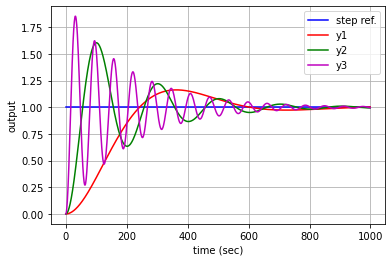

In [2]:
num = 1
den = [10, 0.1, 0]
P = ctl.tf(num,den)
K = [0.001, 0.01, 0.1]
tvec = np.arange(0,1000)
r = np.ones(tvec.shape)
sys1 = ctl.feedback(K[0]*P)
sys2 = ctl.feedback(K[1]*P)
sys3 = ctl.feedback(K[2]*P)
T, y1 = ctl.step_response(sys1, tvec)
T, y2 = ctl.step_response(sys2, tvec)
T, y3 = ctl.step_response(sys3, tvec)
plt.figure()
plt.plot(T,r,'b',T,y1,'r-',T,y2,'g-',T,y3,'m-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('output')
plt.legend(['step ref.','y1','y2','y3'])
plt.show()

<h3>Tracking Performance</h3>
<p />
From the step response comparison, we observe in the lowest gain case that the response gradually rises to the command level 
of 1. When the gain increases, the response is faster, but exceeds 1 further before settling more in an oscillating fashion. 
The step responses from most stable dynamical systems behave quite the same. So we can formulate time-domain parameters that 
can be used as control specifications like shown in Figure 2. Consult an undergrad control text for definition of these 
parameters, some of them may have slight variants among authors. For example, some may define rise time tr as the period the 
response goes from 0.1 to 0.9 of the command value, while the settling time could be specified as the time the response stays
within 0.05 or 0.02 of the command value. 
<p align="center">
<img src="https://drive.google.com/uc?id=1L_SnVcK-Ubqo-925Cb-wXkwcJrOawpOn" width=550 alt="Figure 2"/>
</p>
<div align="center"><b>Figure 2 step response specifications</b></div>
<p />The step response explained thus far is one of the feedback properties called tracking performance. The responses from
proportional control of robot joint, even though they all converges to the command value, may not be satisfactory in practice,
because it takes about 800 seconds (or  13 minutes!) to settle. 
<p />We can improve this step response by adding some dynamics to the controller, instead of using only a proportional gain. 
This results in a more general feedback diagram shown in Figure 3.
<p align="center">
<img src="https://drive.google.com/uc?id=1wb4TYWleOeD6bRXm5VTWdRqbuRWfmiRv" width=550 alt="Figure 3"/>
</p>
<div align="center"><b>Figure 3 Basic closed-loop system with unity feedback</b></div>

<p />The next example exploits a type of simple control, known as a (1st order) lead-lag compensator, that has the controller 
transfer function in the form 
\begin{equation} 
C(s) = K\frac{(s+z)}{(s+p)}  
\end{equation}
<div align="right">(1)</div>
<p />Our control design job is to select the control parameters $K$, $z$, $p$ , to achieve a good tracking response. Note 
that z and p are called the zero and pole of $C(s)$. In general, zeros and poles of a transfer function correspond to the 
roots of its numerator and denominator, respectively. Certain feedback properties can be determined from their locations. 
We will get back to this later. 
<p />For the time being, we will test the robot joint with this lead-lag controller
\begin{equation} 
C(s) = 20000\frac{(s+0.01)}{(s+100)}  
\end{equation}
<div align="right">(2)</div>
<p />Execute the cell below to see the step response.

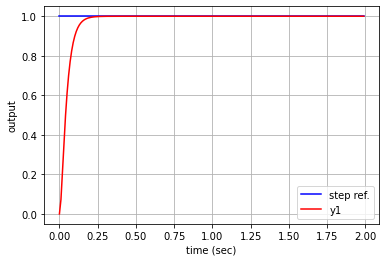

In [3]:
# robot-joint plant
pnum = 1
pden = [10, 0.1, 0]
P = ctl.tf(pnum,pden)
#print(P)
# lead-lag controller
cnum = [1, 0.01]
cden = [1, 100]
C = 20000*ctl.tf(cnum,cden)
#print(C)
tvec = np.arange(0,2,0.01)
r = np.ones(tvec.shape)
sys = ctl.feedback(C*P)
#print(sys)
T, y = ctl.step_response(sys, tvec)

plt.figure()
plt.plot(T,r,'b',T,y,'r-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('output')
plt.legend(['step ref.','y1'])
plt.show()

Obviously, tracking performance is vastly improved, since now the step response settles within 0.2 second, compared to 800 
seconds when using only proportional gain. 
<p />Is there any drawback in replacing the static gain with this dynamic controller? Go back to the proportional control 
gain simulation. You can verify by yourself that increasing the gain can never destabilize the system. For the lead-lag 
compensator, let’s see what happen when some control engineer  might errornously switch the zero and pole location to
\begin{equation} 
C(s) = 20000\frac{(s+100)}{(s+0.01)}  
\end{equation}
<div align="right">(3)</div>
<p />Running the simulation with this compensator yields the step response

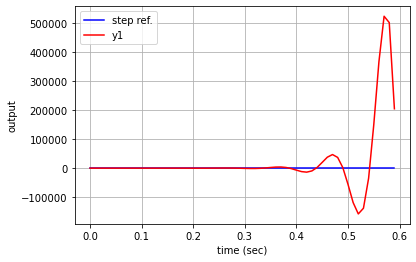

In [4]:
# bad controller
cnum = [1, 100]
cden = [1, 0.01]
C = 20000*ctl.tf(cnum,cden)
#print(C)
tvec = np.arange(0,0.6,0.01)
r = np.ones(tvec.shape)
sys = ctl.feedback(C*P) 
#print(sys)
T, y = ctl.step_response(sys, tvec)

plt.figure()
plt.plot(T,r,'b',T,y,'r-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('output')
plt.legend(['step ref.','y1'])
plt.show()

This is an example of unstable response, as the output grows out of bound. So, in the next section, we study in more 
detail this important feedback property.
<h3>Closed-Loop Stability</h3>
<p />We should have put this statement before anything else: <em>a feedback system must be stable.</em> An unstable 
    closed-loop system is not only useless, it can also cause harm to the operator and/or environment. Imagine an output 
    as in the cell above would cause the robot arm to swing wildly and hit anything in the area. 
<p />As already well-known, for an SISO system like our DC motor robot joint, feedback stability can be checked from the poles 
of a closed-loop transfer function. For a stable system, all such poles must lie in the left half of complex plane. A system 
with pole(s) on the $j\omega$ axis, which gives oscillatory response is called marginally stable.  
<p />For example, the transfer function from $r$ to $y$ with unity feedback in Figure 3 
can be computed as
\begin{equation} 
T_{yr}(s) = \frac{C(s)P(s)}{1+C(s)P(s)}  
\end{equation}
<div align="right">(4)</div>
<p />To form $T_{yr}$ using Python control system is straightforward

In [5]:
# robot-joint plant
pnum = 1
pden = [10, 0.1, 0]
P = ctl.tf(pnum,pden)

# lead-lag controller
cnum = [1, 0.01]
cden = [1, 100]
C = 20000*ctl.tf(cnum,cden)
T_yr = ctl.feedback(C*P)
T_yr

TransferFunction(array([20000.,   200.]), array([1.0000e+01, 1.0001e+03, 2.0010e+04, 2.0000e+02]))

Note that the resulting $T_{yr}$ is not minimal; i.e., it has a common pole and zero at -0.01, as can be observed 
by issuing the pole-zero mapping command

(array([-7.23606798e+01+0.j, -2.76393202e+01+0.j, -1.00000000e-02+0.j]),
 array([-0.01+0.j]))

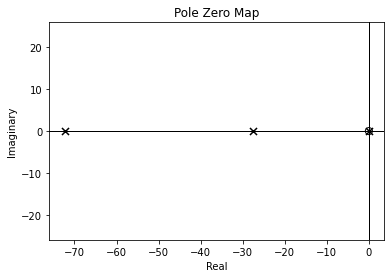

In [6]:
ctl.pzmap(T_yr)

We can determine stability of the closed-loop system by the pole location of $T_{yr}$. Since they are all in the left half 
complex plane, $T_{yr}$ is stable, as confirmed by the step response simulation. In the blank cell below, it is left as an 
exercise for the reader that the closed-loop system with controller (3) has some pole(s) on the right half complex plane. 

<h3>Sensitivity Transfer Function</h3>
<p />Suppose that, in addition to tracking performance, we are interested in another feedback property; i.e., how well 
a controller attenuates some disturbance signals, whether it is injected at the input or output of the plant. Figure 4 shows
the case of output disturbance attenuation. A disturbance signal might result from vibration, load variance, or in the case 
of a multi-joint robot aram, force exerted from adjacent joint movement. It is desirable that the effect of disturbance upon 
plant output should be as small as possible. Quantitatively, this can be casted as disturbance attenuation specs.
<p align="center">
<img src="https://drive.google.com/uc?id=1PKNzw6SOwDD1E-goMRMMIuGy2D-k4E3j" width=550 alt="Figure 4"/>
</p>
<div align="center"><b>Figure 4 feedback diagram with output disturbance</b></div>
<p />Generally speaking, the response at any measured point $y$ to an input injected at any point $x$ in the feedback loop is 
dictated by $T_{yx}$, the closed-loop transfer function from $x$ to $y$.  Let’s denote the disturbance signal and plant output 
by d and y, respectively. So to compute attenuation level for the feedback model in Figure 9, we need to derive the transfer 
function from the output disturbance to the plant output. With simple block diagram manipulation, it can be shown this 
transfer function equals 
\begin{equation} 
T_{yd}(s) = \frac{1}{1+C(s)P(s)} = \frac{1}{1+L(s)}  
\end{equation}
<div align="right">(5)</div>
<p />by introducing the loop transfer function $L(s) = C(s)P(s)$. This closed-loop transfer function $T_{yd}(s)$ is well-studied 
in control literature. It bears a specific name the sensitivity transfer function, and is often denoted by $S$; i.e.,
\begin{equation} 
S(s) = \frac{1}{1+L(s)}  
\end{equation}
<div align="right">(6)</div>
<p />With plant and controller data from above, $S$ is computed and its frequency response displayed as follows 

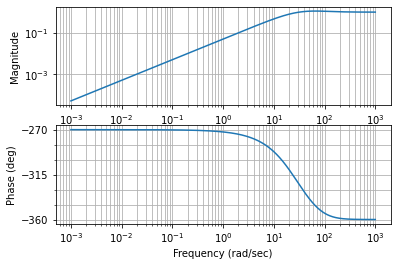

In [7]:
# robot-joint plant
pnum = 1
pden = [10, 0.1, 0]
P = ctl.tf(pnum,pden)

# lead-lag controller
cnum = [1, 0.01]
cden = [1, 100]
C = 20000*ctl.tf(cnum,cden)
L = C*P
S = 1/(1+L)
mag,ph,om = ctl.bode_plot(S)

The phase of sensitivity function has no useful information. Take a note on the shape of sensitivity 
frequency system, which always looks more or less like this for a typical system that has nonzero DC gain. Attenuation is good 
in the low frequency range, then the response goes to 0 dB as frequency increases. We will study how to formulate this curve as
control specifications in later module.  

<h3>Summary</h3>
<p />In this study module, we examine some important feedback properties, starting from step response in time-domain, which 
can be used to tune a commercial controller such as PID, or as specifications for custom control design. The most important 
property of a feedback system is stability. We show how to determine whether a system is stable by checking the poles of 
closed-loop transfer function. 
In the last section, we discuss disturbance attenuation property of a feedback system in terms of sensitivity transfer function.
<p />In the discussion, we mention 2 important transfer functions, namely the loop transfer 
function $L(s)$ , and the sensitivity transfer function $S(s)$. To anticipate the development in later module, 
we have to mention that (4), often denoted simply as $T(s)$, is referred to as complementary sensitivity transfer function. 
This is due to the fact that 
$$
S(s) + T(s) = 1   
$$
<div align = "right">(7)</div>
<p />(7) is called an algebraic constraint. We will see in the next module how this relationship could make feedback system 
design a challenge.

<b>Last update : </b> October 24, 2022
    
Update list :
<ul>
<li />October 24, 2022 : remove <code>!pip install slycot</code>
<li />May 3, 2021 : fix indentation error
</ul>

<p align="center">
<img src="https://drive.google.com/thumbnail?id=13bzT7Rmy3bzvE7TiS0yfQo94kpxMuipF" alt="dewninja"/>
</p>
<div align="center">dew.ninja<br>Copyright 2021</div>